### Import libraries

In [66]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Step 1: Load the dataset
df = pd.read_csv('telecom_churn_data.csv')

In [71]:
# Step 2: Data Quality Checks
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64


In [73]:
# Handle columns with more than 50% missing values
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop)
print(f"Columns dropped due to > 50% missing values: {columns_to_drop}")

Columns dropped due to > 50% missing values: Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


In [75]:
print(df.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

In [87]:
# Step 3: Handle Missing Data for the Remaining Columns by Filling with Zero
# Fill missing values for numerical columns with 0
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(0, inplace=False)

In [89]:
# For categorical columns, fill missing values with 0 (or 'Unknown' if you prefer)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown', inplace=False)

In [91]:
# Step 4: Filter High-Value Customers
# Calculate 70th percentile of recharge amount in June and July
X = df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)  # Average recharge amount across June and July
threshold = np.percentile(X, 70)

In [93]:
# Filter high-value customers
high_value_customers = df[X >= threshold]
print(f"Number of high-value customers: {high_value_customers.shape[0]}")

Number of high-value customers: 30011


In [97]:
# Step 5 Tag Churners Based on the 9th Month (September)
# Efficiently adding the churn column using `.loc` to avoid fragmentation and the SettingWithCopyWarning
high_value_customers.loc[:, 'churn'] = np.where(
    (high_value_customers['total_ic_mou_9'] == 0) & 
    (high_value_customers['total_og_mou_9'] == 0) &
    (high_value_customers['vol_2g_mb_9'] == 0) & 
    (high_value_customers['vol_3g_mb_9'] == 0), 1, 0
)

# If you want to concatenate the churn column with other calculated features or data efficiently:
high_value_customers_cleaned = pd.concat([high_value_customers, churn_data[['churn']]], axis=1)

# Ensure no fragmentation (this might not always be necessary but can help if fragmentation is significant)
high_value_customers_cleaned = high_value_customers_cleaned.copy()

# Check the updated DataFrame
print(high_value_customers_cleaned.head())


    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  sachet_3g_7  sachet_3g_8  sachet_3g_9  \
7             9/30/2014

In [107]:
# Step 6: Date Handling & Feature Engineering
# Convert date columns to datetime format
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], errors='coerce')
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], errors='coerce')
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], errors='coerce')
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'], errors='coerce')

# Create new columns for "days since last recharge"
days_since_rech = pd.DataFrame({
    'days_since_last_rech_6': (pd.to_datetime('today') - df['date_of_last_rech_6']).dt.days,
    'days_since_last_rech_7': (pd.to_datetime('today') - df['date_of_last_rech_7']).dt.days,
    'days_since_last_rech_8': (pd.to_datetime('today') - df['date_of_last_rech_8']).dt.days,
    'days_since_last_rech_9': (pd.to_datetime('today') - df['date_of_last_rech_9']).dt.days
})

# Concatenate the new columns to the original dataframe
df = pd.concat([df, days_since_rech], axis=1)

# Handle NaN values in the "days since last recharge" columns (fill with zero)
df[['days_since_last_rech_6', 'days_since_last_rech_7', 'days_since_last_rech_8', 'days_since_last_rech_9']] = \
    df[['days_since_last_rech_6', 'days_since_last_rech_7', 'days_since_last_rech_8', 'days_since_last_rech_9']].fillna(0)


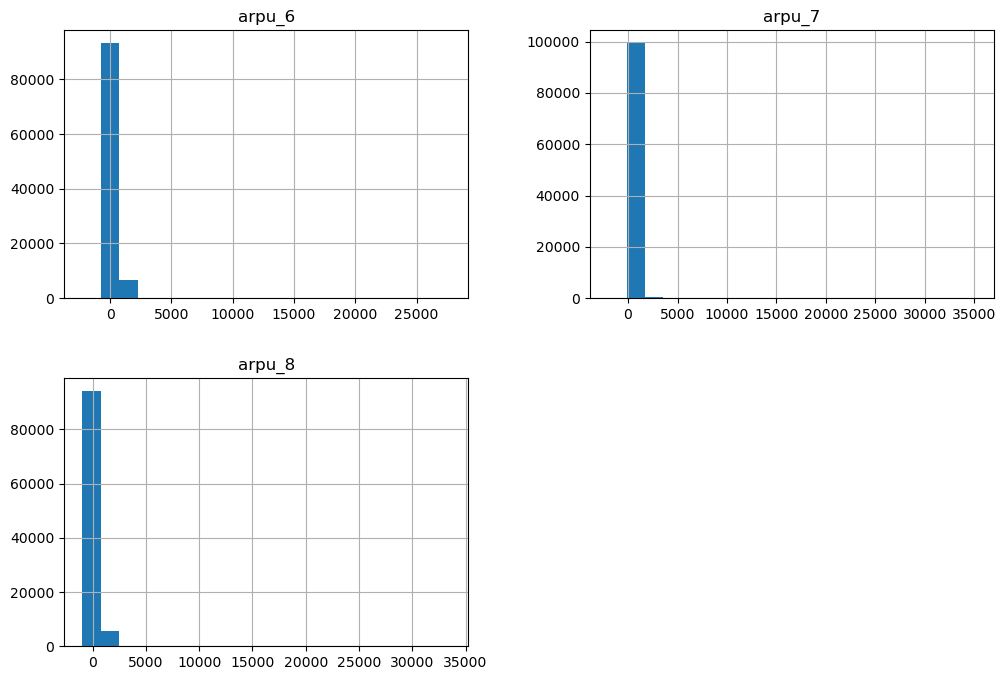

In [109]:
# Step 7: Exploratory Data Analysis (EDA)
# Visualizing the distributions of numerical features
numerical_features = ['arpu_6', 'arpu_7', 'arpu_8']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.show()

In [111]:
# Correlation heatmap to inspect relationships between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

ValueError: could not convert string to float: '6/30/2014'

C:\Users\S1007\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


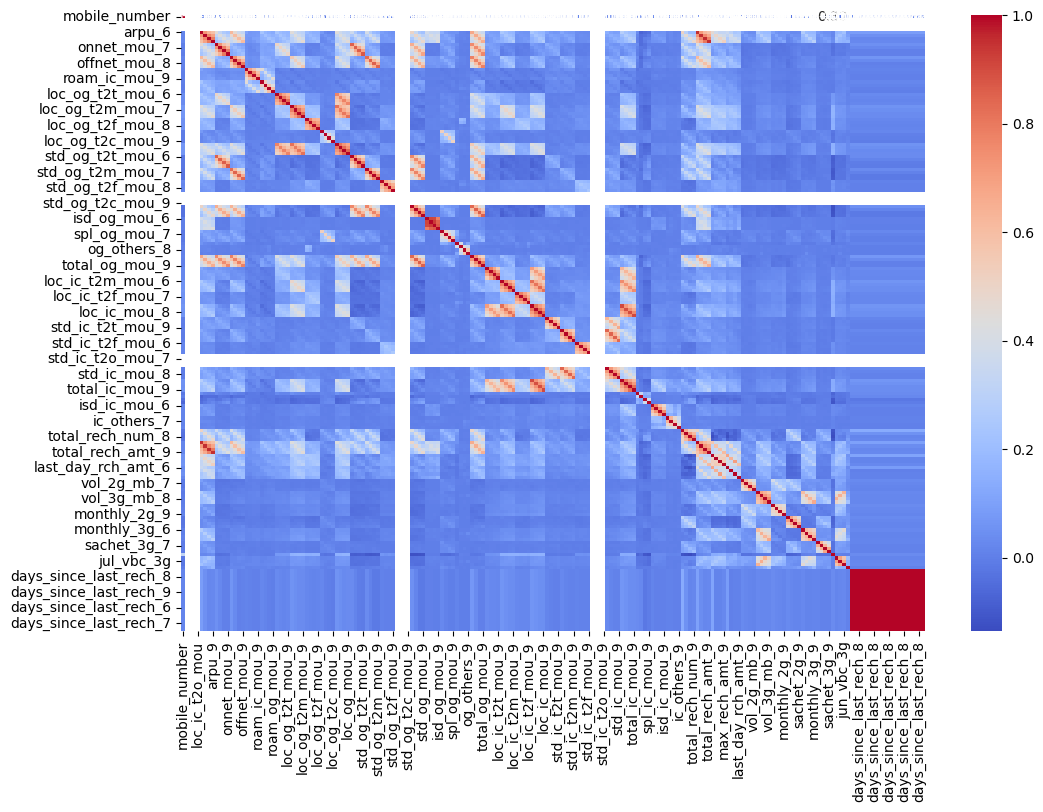

In [113]:
### Updated Code for Handling Data Type Conversion:
# Step 1: Convert columns to numeric if they are stored as strings
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 2: Convert date columns to datetime format
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

# Step 3: Handle missing or invalid values by filling or dropping them (as needed)
# Example: fill NaN with 0 for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(0)

# Step 4: Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['number'])

# Step 5: Compute correlation matrix and plot the heatmap
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [117]:
# Step 8: Feature Engineering (e.g., creating rolling averages)
# Create rolling averages for 'arpu_6', 'arpu_7', and 'arpu_8' in one step
rolling_arpu = pd.DataFrame({
    'rolling_arpu_6_7': df[['arpu_6', 'arpu_7']].mean(axis=1),
    'rolling_arpu_7_8': df[['arpu_7', 'arpu_8']].mean(axis=1)
})

# Concatenate the new rolling columns with the original dataframe all at once
df = pd.concat([df, rolling_arpu], axis=1)

# Optionally, create a copy to avoid fragmentation
df = df.copy()

# Check the updated dataframe
print(df.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  days_since_last_rech_8  \
0            9/30/2014  197.385  ...                

In [119]:
# Step 9: Model Building (Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [121]:
# Split data into features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

KeyError: "['churn'] not found in axis"

In [123]:
df['churn'] = np.where(
    (df['total_ic_mou_9'] == 0) & 
    (df['total_og_mou_9'] == 0) &
    (df['vol_2g_mb_9'] == 0) & 
    (df['vol_3g_mb_9'] == 0), 1, 0
)


In [127]:
# Check if 'churn' column exists

if 'churn' in df.columns:
    X = df.drop('churn', axis=1)
    y = df['churn']
else:
    print("The 'churn' column does not exist in the DataFrame.")

In [129]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Logistic Regression Model
# Step 1: Check the data types of all columns
print(X_train.dtypes)

# Step 2: Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Step 3: Remove date columns (or convert them if needed)
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
X_train = X_train.drop(columns=[col for col in date_columns if col in X_train.columns], errors='ignore')
X_test = X_test.drop(columns=[col for col in date_columns if col in X_test.columns], errors='ignore')

# Step 4: Ensure remaining non-numeric columns are handled
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Step 5: Verify that X_train is fully numeric before fitting the model
print(X_train.dtypes)

# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

mobile_number               int64
circle_id                   int64
loc_og_t2o_mou            float64
std_og_t2o_mou            float64
loc_ic_t2o_mou            float64
                           ...   
days_since_last_rech_9    float64
rolling_arpu_6_7          float64
rolling_arpu_7_8          float64
rolling_arpu_6_7          float64
rolling_arpu_7_8          float64
Length: 210, dtype: object
Non-numeric columns: Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou            float64
std_og_t2o_mou            float64
loc_ic_t2o_mou            float64
                           ...   
days_since_last_rech_9    float64
rolling_arpu_6_7          float64
rolling_arpu_7_8          float64
rolling_arpu_6_7          float64
rollin

LogisticRegression(max_iter=1000)

In [135]:
# Predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [137]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     17927
           1       0.00      0.00      0.00      2073

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.80      0.90      0.85     20000

Confusion Matrix:
 [[17927     0]
 [ 2073     0]]
ROC AUC Score: 0.561658498658506


C:\Users\S1007\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S1007\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S1007\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


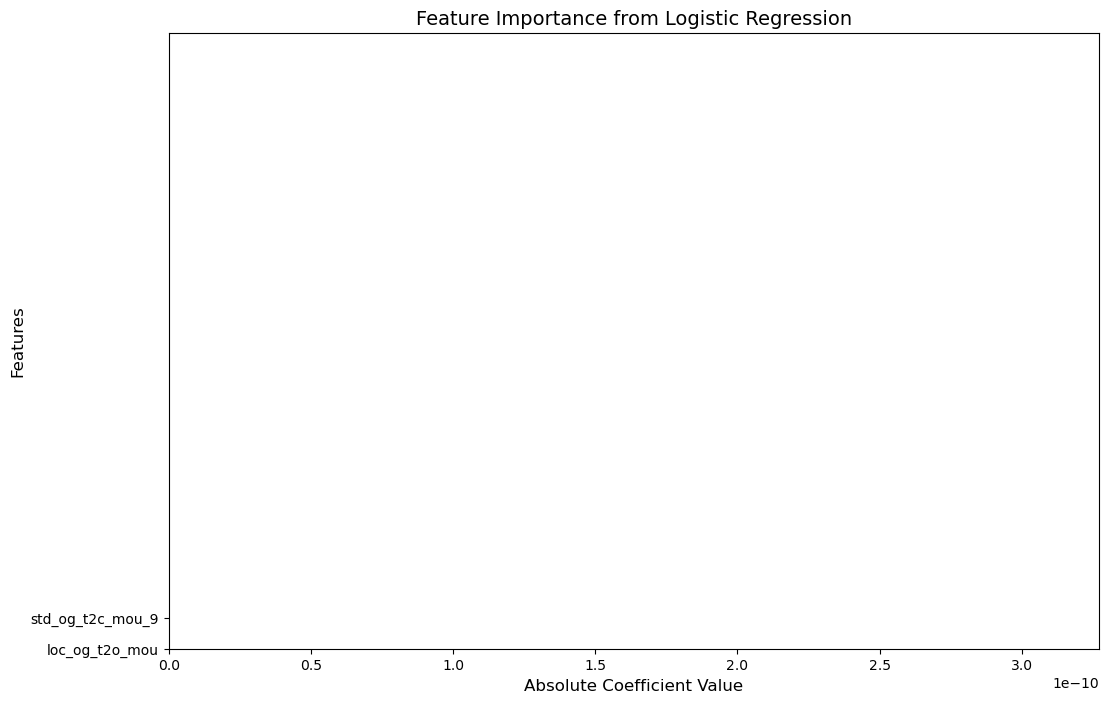

In [143]:
# Step 10: Feature Importance (Logistic Regression Coefficients)

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure coefficients align with feature names
actual_features = X_train.columns[:model.coef_.shape[1]]

# Create a DataFrame for feature importance
coefficients = pd.DataFrame(model.coef_.flatten(), index=actual_features, columns=['Coefficient'])

# Calculate absolute values for ranking
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=False)

# 🔹 Adjust figure size and rotation to prevent overlapping
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients['Abs Coefficient'], y=coefficients.index, palette="viridis")

# 🔹 Improve readability
plt.title('Feature Importance from Logistic Regression', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Rotate labels if needed

# 🔹 Optional: Show only top 20 features to prevent excessive overlap
plt.ylim(len(coefficients) - 20, len(coefficients))  

plt.show()


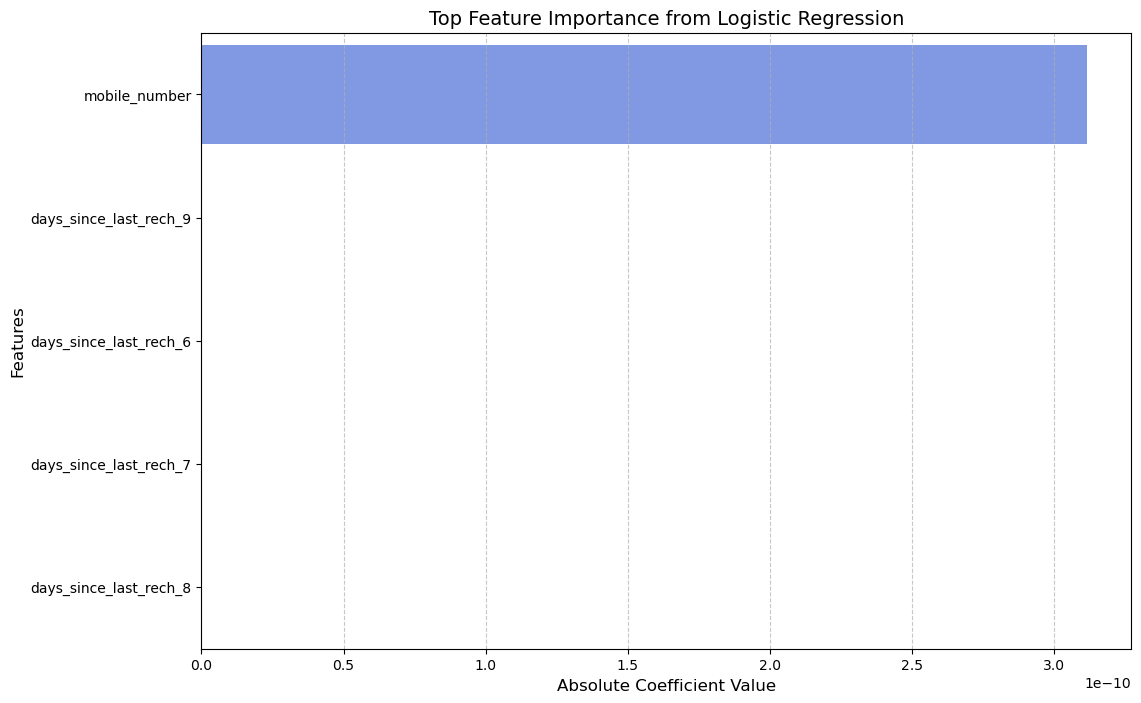

In [147]:
# Visualize feature importance
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure coefficients align with feature names
actual_features = X_train.columns[:model.coef_.shape[1]]

# Create a DataFrame for feature importance
coefficients = pd.DataFrame(model.coef_.flatten(), index=actual_features, columns=['Coefficient'])

# Calculate absolute values for ranking
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=False)

# 🔹 Show Only Top 20 Features for Better Visualization
top_n = 20  # Change this if you want to see more/less features
top_features = coefficients.head(top_n)

# 🔹 Create a Horizontal Bar Plot (Better for Long Feature Names)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features['Abs Coefficient'], y=top_features.index, palette="coolwarm")

# 🔹 Improve Readability
plt.title('Top Feature Importance from Logistic Regression', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Ensures labels are properly aligned

# 🔹 Add Grid for Better Readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
